In [4]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

830.0000000000001


<IPython.core.display.Javascript object>


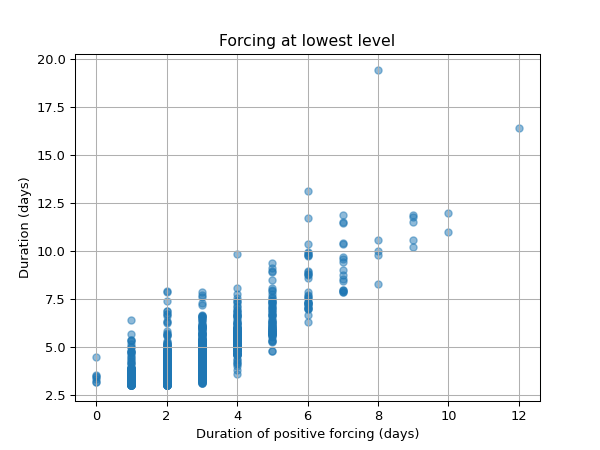

(0.8123220007076967, 0.0)


Text(0.5, 1.0, 'Forcing at lowest level')

In [71]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datk', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_priorik', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startk', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[7])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
test=[]

for i in range(len(heat_index)):
    
    ah=convfh[i][:,:1].sum(axis=1)
    av=convfv[i][:,:1].sum(axis=1)
    a=np.array(ah)+np.array(av)

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    test.append(len(a[np.where(a>0)]))
#     test.append(np.max(a))
        
plt.scatter(test, dur_list,s=30,alpha=0.5)
print(scipy.stats.pearsonr(dur_list, test))
plt.grid()
plt.ylabel('Duration (days)')
plt.xlabel('Duration of positive forcing (days)')
plt.title('Forcing at lowest level')

290.00000000000006


<IPython.core.display.Javascript object>


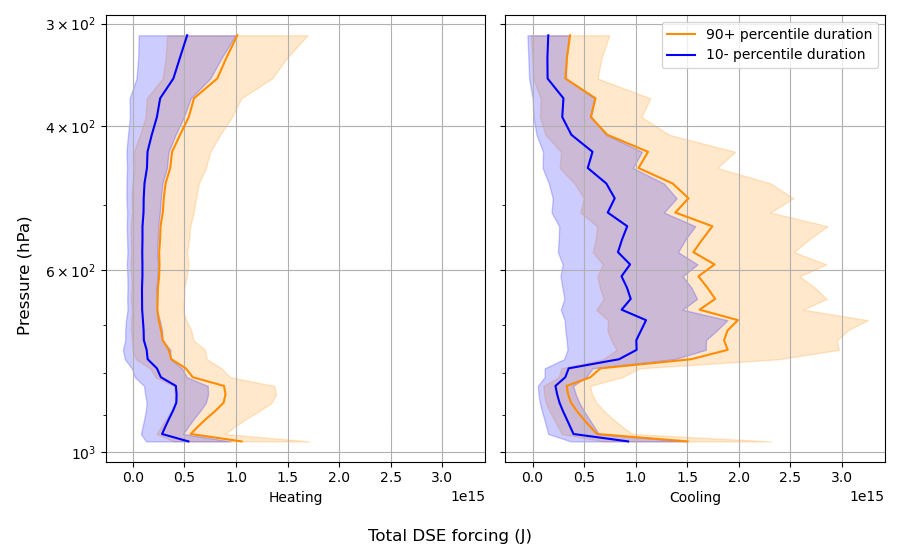

In [5]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=convf[i][:,:34]/2000+convv[i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])

collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).sum(axis=1))
    colln.append(np.transpose(neg).sum(axis=1))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 5.5)

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0].plot(mean, p_std[:34], color='darkorange')

ax[0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1].plot(mean, p_std[:34], color='darkorange', label='90+ percentile duration')

plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0].grid(); ax[1].grid()

ax[1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])

collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).sum(axis=1))
    colln.append(np.transpose(neg).sum(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0].plot(mean, p_std[:34], color='blue')

ax[0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1].plot(mean, p_std[:34], color='blue', label='10- percentile duration')

ax[1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1].legend()
ax[0].set_xlabel('Heating')
ax[1].set_xlabel('Cooling')

fig.supxlabel('Total DSE forcing (J)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('Vertical profiles')
plt.tight_layout()

290.00000000000006


<IPython.core.display.Javascript object>


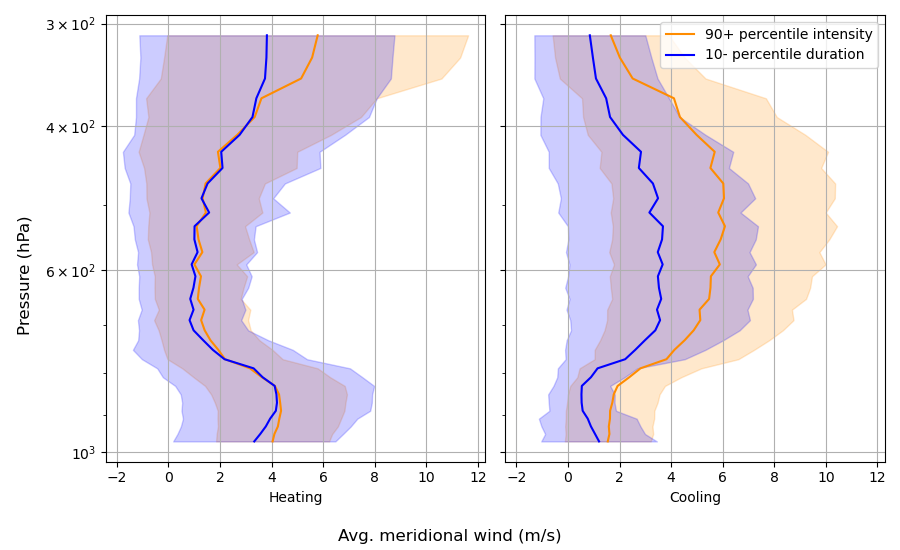

In [7]:
########################################### xtra code ######################################
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datk', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/dsegrad_datk', 'rb') as f:
    dsex,dsey,dsez=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/wind_datk', 'rb') as f:
    wx,wy,wz=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_priorik', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startk', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]
dse_list=[]

for i in range(len(convf)):
    a_full=convf[i][:,:34]/2000+convv[i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)
    dse_list.append(wy[i][:,:34])

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]
dse_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])
        dse_sel.append(dse_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))/a_sel[i]
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))/-a_sel[i]
    dsep=dse_sel[i]*pos
    dsen=dse_sel[i]*neg
    collp.append(np.transpose(dsep).mean(axis=1))
    colln.append(np.transpose(dsen).mean(axis=1))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 5.5)

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0].plot(mean, p_std[:34], color='darkorange')

ax[0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1].plot(mean, p_std[:34], color='darkorange', label='90+ percentile intensity')

plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0].grid(); ax[1].grid()

ax[1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
dse_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])
        dse_sel.append(dse_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))/a_sel[i]
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))/-a_sel[i]
    dsep=dse_sel[i]*pos
    dsen=dse_sel[i]*neg
    collp.append(np.transpose(dsep).mean(axis=1))
    colln.append(np.transpose(dsen).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0].plot(mean, p_std[:34], color='blue')

ax[0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1].plot(mean, p_std[:34], color='blue', label='10- percentile duration')

ax[1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1].legend()
ax[0].set_xlabel('Heating')
ax[1].set_xlabel('Cooling')

fig.supxlabel('Avg. meridional wind (m/s)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('Vertical profiles')
plt.tight_layout()

290.00000000000006


<IPython.core.display.Javascript object>


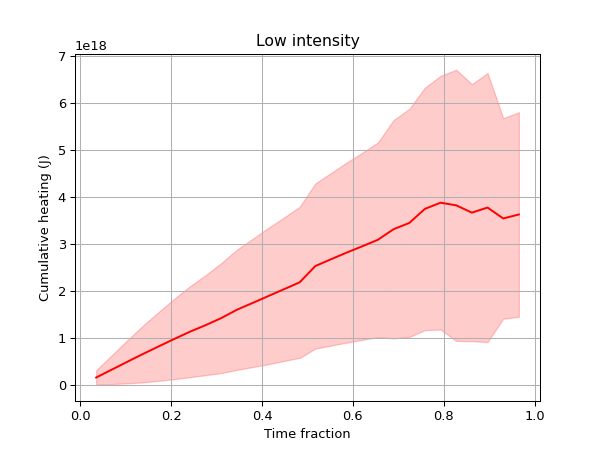

Text(0.5, 1.0, 'Low intensity')

In [28]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datk', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_priorik', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startk', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
heat_list=[]
cool_list=[]

for i in range(len(convf)):
    a=convf[i][1:,:7].sum(axis=1)
    comp=np.zeros(len(a))
    src=np.insert((np.maximum(a,comp)).cumsum(),0,0)
    snk=np.insert((np.minimum(a,comp)).cumsum(),0,0)
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    heat_list.append(src)
    cool_list.append(snk)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.linspace(0,1,len(heat_list[i]))[:heat_end])
        yy.append(heat_list[i][:heat_end])
        
#         xx.append(np.linspace(0,1,len(cool_list[i]))[cool_end:])
#         yy.append(cool_list[i][cool_end:])
        
#         plt.plot(np.linspace(0,1,len(heat_list[i]))[:heat_end],heat_list[i][:heat_end])
#         plt.plot(np.linspace(0,1,len(cool_list[i]))[cool_end:],cool_list[i][cool_end:])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
plt.plot(x_arr[:],mean_arr[:], color='red')
plt.fill_between(x_arr[:], (mean_arr-std_arr)[:],(mean_arr+std_arr)[:], alpha=0.2,color='red')
plt.grid()
plt.xlabel('Time fraction')
plt.ylabel('Cumulative heating (J)')
plt.title('Low intensity')

290.00000000000006


<IPython.core.display.Javascript object>


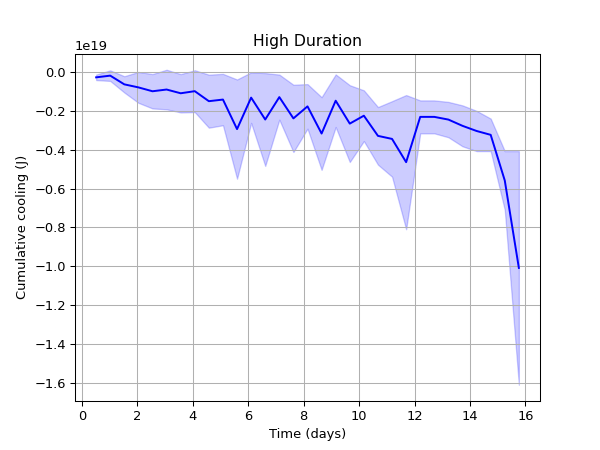

Text(0.5, 1.0, 'High Duration')

In [55]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexk', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datk', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_priorik', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startk', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
heat_list=[]
cool_list=[]

for i in range(len(convf)):
    a=convf[i][1:,:7].sum(axis=1)
    comp=np.zeros(len(a))
    src=np.insert((np.maximum(a,comp)).cumsum(),0,0)
    snk=np.insert((np.minimum(a,comp)).cumsum(),0,0)
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    heat_list.append(src)
    cool_list.append(snk)

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
#         xx.append(np.arange(0,len(heat_list[i]))[:heat_end])
#         yy.append(heat_list[i][:heat_end])
        
        xx.append(np.arange(0,len(heat_list[i]))[cool_end:])
        yy.append(cool_list[i][cool_end:])
        
#         plt.plot(np.arange(0,len(heat_list[i]))[:heat_end],heat_list[i][:heat_end])
#         plt.plot(np.arange(0,len(heat_list[i]))[cool_end:],cool_list[i][cool_end:])

xx_arr=np.linspace(0,30,60)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
plt.plot(x_arr[:-4],mean_arr[:-4], color='blue')
plt.fill_between(x_arr[:-4], (mean_arr-std_arr)[:-4],(mean_arr+std_arr)[:-4], alpha=0.2,color='blue')
plt.grid()
plt.xlabel('Time (days)')
plt.ylabel('Cumulative cooling (J)')
plt.title('High Duration')